In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Dengan method .head(), kita dapat dengan mudah melihat beberapa baris pertama.

Sekarang kita dapat menjawab pertanyaan awal kita, apa saja fiturnya? Cukup mudah untuk menyimpulkan fitur-fitur berikut dari nama kolom:

ST_NUM: Street number

ST_NAME: Street name

OWN_OCCUPIED: Is the residence owner occupied

NUM_BEDROOMS: Number of bedrooms

Kita juga bisa menjawab, tipe apa yang diharapkan?

ST_NUM: float or int… some sort of numeric type

ST_NAME: string

OWN_OCCUPIED: string… Y (“Yes”) or N (“No”)

NUM_BEDROOMS: float or int, a numeric type

Untuk menjawab dua pertanyaan berikutnya, kita perlu mulai mempelajari Pandas lebih jauh. Mari kita lihat contoh cara mendeteksi missing values.

Standard Missing Values

Jadi apa yang dimaksud dengan "standard missing values"? Standard missing values adalah missing values yang dapat dideteksi Pandas.

Kembali ke dataset original kita, mari kita lihat kolom "Street Number".

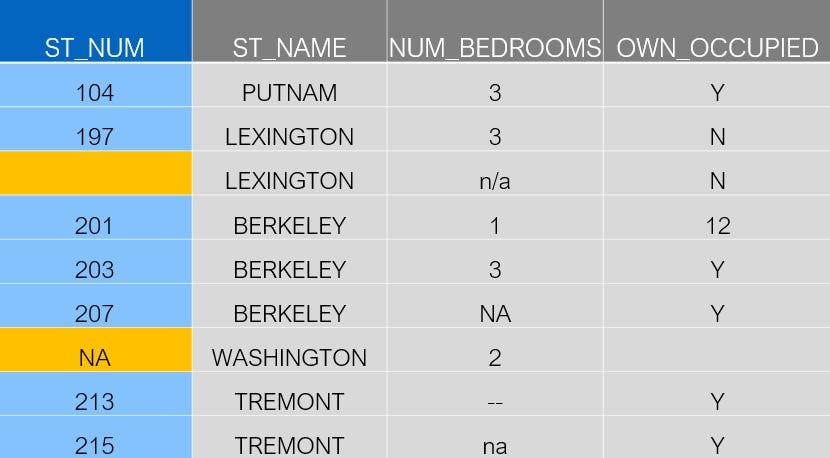

Di baris ketiga ada sel kosong. Di baris ketujuh ada nilai "NA".

Jelas ini adalah missing values. Mari kita lihat bagaimana Pandas menangani ini.

In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

Melihat kolom tersebut, kita dapat melihat bahwa Pandas mengisi ruang kosong dengan “NA”. Dengan menggunakan metode isnull(), kita dapat mengonfirmasi bahwa missing value dan "NA" dikenali sebagai missing value. Kedua tanggapan boolean itu Benar.

Ini adalah contoh sederhana, tetapi menyoroti poin penting. Pandas akan mengenali sel kosong dan tipe "NA" sebagai missing value. Di bagian selanjutnya, kita akan melihat beberapa jenis yang tidak akan dikenali Pandas.

Non-Standard Missing Values

Terkadang mungkin kasus di mana ada missing values yang memiliki format berbeda.

Mari kita lihat kolom "Number of Bedrooms".

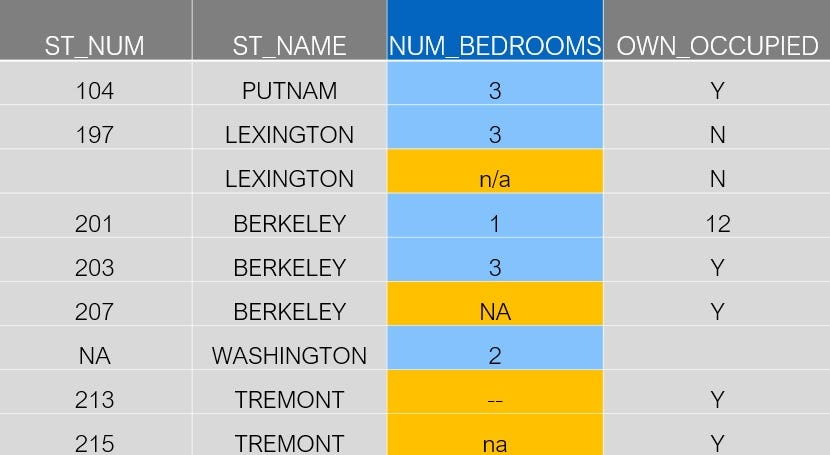

Di kolom ini, ada empat missing values.

n/a

NA

—

na

Dari bagian sebelumnya, kita tahu bahwa Pandas akan mengenali “NA” sebagai missing value, tapi bagaimana dengan yang lain? Mari lihat.

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Sama seperti sebelumnya, Pandas mengenali "NA" sebagai missing value. Sayangnya, jenis lainnya tidak dikenali.

Jika ada beberapa users yang memasukkan data secara manual, ini adalah masalah umum. Mungkin beberapa suka menggunakan "n / a" tapi kalian suka menggunakan "na".

Cara mudah untuk mendeteksi berbagai format ini adalah dengan memasukkannya ke dalam list. Kemudian saat kami mengimpor data, Pandas akan langsung mengenalinya. Berikut adalah contoh bagaimana kita melakukannya.

In [9]:
missing_values = ["n/a", "na", "--"]


In [12]:
df = pd.read_csv("C:/Users/rofya/property_data.csv", na_values = missing_values)

In [13]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [14]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

Kali ini, semua format berbeda dikenali sebagai missing values.

Kalian mungkin tidak dapat langsung menangkap semua ini. Saat kalian mengerjakan data dan melihat tipe lain dari nilai yang hilang, kalian bisa menambahkannya ke daftar.

Penting untuk mengenali jenis missing values non-standar ini untuk tujuan meringkas dan mengubah missing values. Jika kalian mencoba dan menghitung jumlah nilai yang hilang sebelum mengonversi jenis non-standar ini, kalian bisa kehilangan banyak missing values.

Di bagian selanjutnya kita akan melihat jenis missing values yang lebih rumit, tetapi sangat umum.

Unexpected Missing Values

Sejauh ini kita telah melihat missing values, dan non-standard missing values. Bagaimana jika kita memiliki tipe yang tidak terduga? Misalnya, jika fitur kita diharapkan berupa string, tetapi malah jenisnya numerik, maka secara teknis ini juga merupakan missing value.

Mari kita lihat kolom "Owner Occupied" untuk mengetahuinya.

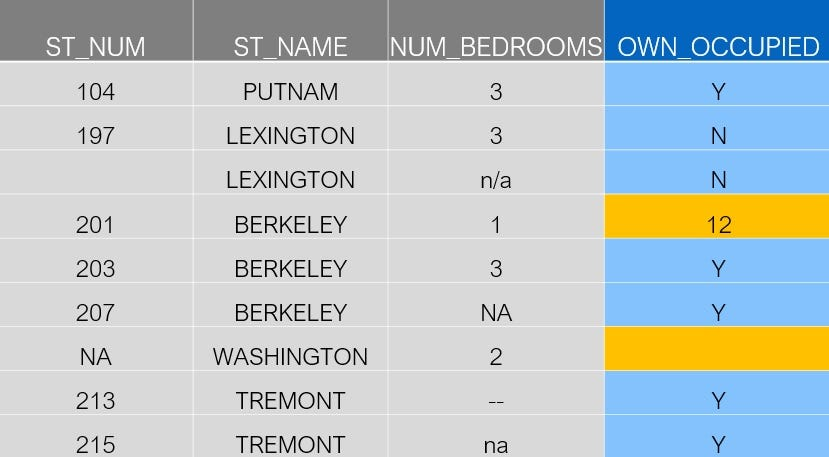

Dari contoh kita sebelumnya, kita tahu bahwa Pandas akan mendeteksi sel kosong di baris tujuh sebagai missing value. Mari kita konfirmasi dengan beberapa kode.

In [15]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [16]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Contoh ini sedikit lebih rumit sehingga kita perlu memikirkan strategi untuk mendeteksi jenis nilai yang hilang ini. Ada sejumlah pendekatan berbeda, tetapi inilah cara kita akan mengatasinya.

Loop pada kolom OWN_OCCUPIED

Kita coba ubah semua entry menjadi integer

Jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value

Jika tidak dapat menjadi integer, maka kita tau kalau entry adalah string, keep going

Mari kita lihat kodenya dan kemudian kita akan membahasnya secara mendetail.

In [17]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [18]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Dalam kode diatas, kita looping setiap entri di kolom "Owner Occupied". Untuk mencoba dan mengubah entri menjadi integer, kita menggunakan int(row).

Jika nilai dapat diubah menjadi bilangan bulat, kita mengubah entri menjadi missing value menggunakan np.nan Numpy.

Di sisi lain, jika tidak dapat diubah menjadi bilangan bulat, kita pass dan keep going.

Kalian akan melihat bahwa kita menggunakan try dan except ValueError. Ini disebut exception handling, dan kita menggunakan ini untuk menangani errors.

Jika kita mencoba dan mengubah entri menjadi integer dan tidak dapat diubah, ValueError akan di return, dan kode akan berhenti. Untuk mengatasi ini, kita menggunakan exception handling untuk mengenali error ini, dan terus berjalan.

Summarizing Missing Values

Setelah kita membersihkan missing values, kita mungkin ingin melihat summary-nya. Misalnya, kita mungkin ingin melihat jumlah total missing values untuk setiap feature.

In [19]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

Di lain waktu, kita mungkin ingin melakukan pemeriksaan cepat untuk melihat apakah kita memiliki nilai yang hilang sama sekali.

In [20]:
df.isnull().values.any()

True

Kita mungkin juga ingin mendapatkan jumlah total missing values.

In [21]:
df.isnull().sum().sum()

12

Replacing

Seringkali kalian harus memikirkan bagaimana kalian menangani missing values.

Terkadang kalian hanya ingin menghapus baris tersebut, di lain waktu kalian menggantinya.

In [22]:
# Maybe you just want to fill in missing values with a single value.

df['ST_NUM'].fillna(125, inplace=True)

Kemungkinan besar, kalian mungkin ingin melakukan imputasi berbasis lokasi/location based imputation. Inilah cara kalian melakukannya.

In [23]:
df.loc[2,'ST_NUM'] = 125

Cara yang sangat umum untuk mengganti missing values menggunakan median.

In [25]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [26]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


Analyzing Obesity in England

In [30]:
%matplotlib inline
data = pd.ExcelFile('C:/Users/rofya/obes.xls')

In [31]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

Kita akan fokus pada sheet 7.2. Sekarang jika kalian melihat 7.2 di Excel, kalian akan melihat bahwa 4 baris teratas dan 14 baris terbawah berisi info yang tidak berguna. Kita hanya membutuhkan baris 5-18.

In [32]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili column headers. Kita memiliki baris kosong di file asli, dan itu muncul sebagai NaN (Bukan angka).

Jadi sekarang kita perlu melakukan dua hal:

Rename the first header to Year, and

Get rid of any empty rows.

In [33]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

Di sini kita memberi tahu Pandas untuk mengganti nama kolom Unnamed: 0 menjadi Year. menggunakan fungsi rename().

inplace = True modifies the existing object. Without this, Pandas will create a new object and return that.

Selanjutnya mari kita hapus baris kosong yang diisi dengan NaN:

In [34]:
data_age.dropna(inplace=True)

Ada satu hal lagi yang perlu kita lakukan yang akan membuat hidup kita lebih mudah. Jika kalian melihat data_age, nilai pertama adalah angka. Ini adalah indeksnya, dan Pandas menggunakan praktik Excel default yang memiliki angka sebagai indeks. Namun, kita ingin mengubah indeks menjadi Tahun. Ini akan mempermudah pembuatan plot, karena indeks biasanya diplot sebagai sumbu x.

In [35]:
data_age.set_index('Year', inplace=True)
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<Axes: xlabel='Year'>

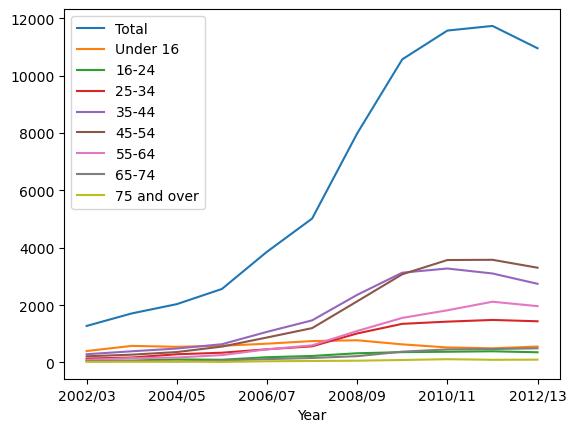

In [36]:
data_age.plot()

Ups. Ada masalah: Data asli kita berisi total yang menutupi bidang lainnya. Kita perlu menyingkirkannya.

In [37]:
data_age_minus_total = data_age.drop('Total', axis=1)

<Axes: xlabel='Year'>

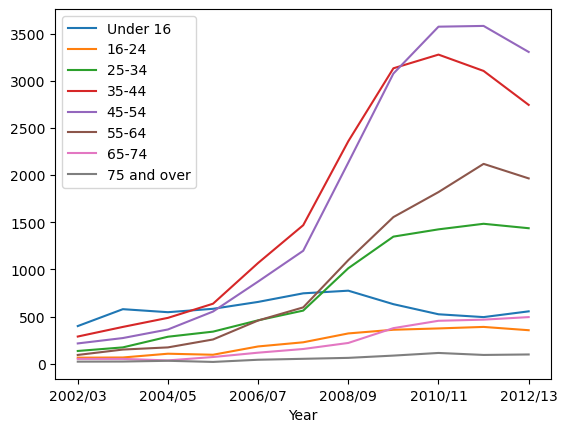

In [38]:
data_age_minus_total.plot()

Jauh lebih baik. Kita benar-benar dapat melihat kelompok usia individu sekarang. Bisakah kita melihat kelompok usia mana yang memiliki obesitas tertinggi?

Kembali ke pertanyaan awal kita: Are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak di bawah usia 16 tahun dan orang dewasa dengan rentang usia 35-44 tahun.

<Axes: xlabel='Year'>

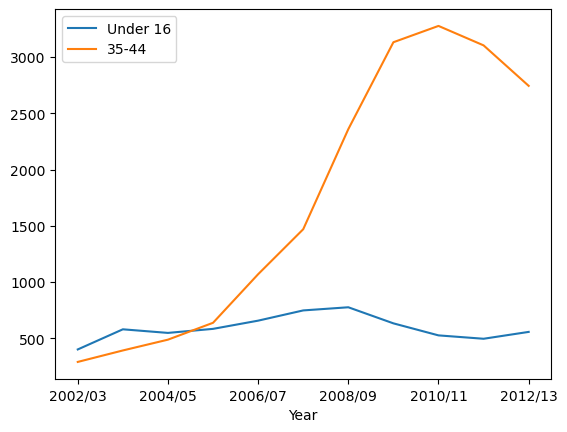

In [39]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

So who is getting fatter?

Ketika obesitas anak sedikit menurun, orang tua mereka membengkak. Jadi nampaknya para orang tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.

Time Series

Basic Time Series Manipulation

Pertama import libraries yang kita butuhkan dan gunakan untuk membuat date range.

In [40]:
from datetime import datetime

date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

Date range ini memiliki timestamps dengan frekuensi per jam. Jika kita memanggil date_rng kita akan melihat seperti berikut:

In [41]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

Mari buat contoh data frame dengan timestamp dan lihat 15 elemen pertama:

In [43]:
df = pd.DataFrame(date_rng, columns=['date'])

In [44]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [45]:
df.head()

,date,data
0,2020-01-01 00:00:00,13
1,2020-01-01 01:00:00,57
2,2020-01-01 02:00:00,48
3,2020-01-01 03:00:00,57
4,2020-01-01 04:00:00,14


Jika kita ingin melakukan manipulasi deret waktu/time series, kita perlu memiliki date time index sehingga data frame kita diindeks pada timestamp.

Konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama:

In [46]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2020-01-01 00:00:00,13
2020-01-01 01:00:00,57
2020-01-01 02:00:00,48
2020-01-01 03:00:00,57
2020-01-01 04:00:00,14


Bagaimana jika ‘time’ stamps dalam data kita sebenarnya berjenis string vs. numerik?

Mari kita ubah date_rng kita menjadi list of string dan kemudian ubah string tersebut menjadi stempel waktu.

In [47]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [48]:
# Kita dapat mengonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya:

timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

Tetapi bagaimana jika kita perlu mengubah format unique string?

Mari kita buat daftar tanggal yang berubah-ubah menjadi string dan mengubahnya menjadi timestamps:

In [49]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

Seperti apa jadinya jika kita memasukkan ini ke dalam data frame?

In [50]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Kembali ke data frame asli kita, mari kita lihat datanya dengan parsing pada timestamp index:

Katakanlah kita hanya ingin melihat data di mana tanggalnya adalah tanggal 2 setiap bulannya, kita bisa menggunakan indeks seperti di bawah ini.

In [51]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,6
2020-01-02 01:00:00,24
2020-01-02 02:00:00,30
2020-01-02 03:00:00,71
2020-01-02 04:00:00,51
2020-01-02 05:00:00,74
2020-01-02 06:00:00,30
2020-01-02 07:00:00,92
2020-01-02 08:00:00,4


In [52]:
# Kita juga bisa langsung memanggil tanggal yang ingin kita lihat melalui index dari data frame:

df['2020-01-03']

C:\Users\rofya\AppData\Local\Temp\ipykernel_11932\490348284.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,49
2020-01-03 01:00:00,4
2020-01-03 02:00:00,67
2020-01-03 03:00:00,62
2020-01-03 04:00:00,59
2020-01-03 05:00:00,38
2020-01-03 06:00:00,72
2020-01-03 07:00:00,65
2020-01-03 08:00:00,25


In [53]:
# Bagaimana dengan memilih data di antara tanggal tertentu?

df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,44
2020-01-04 01:00:00,40
2020-01-04 02:00:00,27
2020-01-04 03:00:00,86
2020-01-04 04:00:00,6
...,...
2020-01-06 19:00:00,13
2020-01-06 20:00:00,18
2020-01-06 21:00:00,59


Basic data frame yang telah kita buat memberi kita data dengan frekuensi per jam, tetapi kita dapat mengambil ulang sampel/resample data pada frekuensi yang berbeda dan menentukan bagaimana kita ingin menghitung summary statistic untuk frekuensi sampel baru.

Kami dapat mengambil min, max, average, sum, dll., Dari data pada frekuensi harian daripada frekuensi per jam seperti contoh di bawah ini tempat kita menghitung rata-rata harian dari data:

In [54]:
df.resample('D').mean()

,data
datetime,
2020-01-01,42.041667
2020-01-02,45.333333
2020-01-03,49.333333
2020-01-04,41.250000
2020-01-05,49.541667
2020-01-06,42.416667
2020-01-07,49.375000
2020-01-08,57.000000


Bagaimana dengan window statistics seperti rolling mean atau rolling sum?

Mari buat kolom baru di df asli kita yang menghitung rolling sum selama periode 3 window dan kemudian lihat di bagian atas data frame:

In [55]:
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,13,NaN
2020-01-01 01:00:00,57,NaN
2020-01-01 02:00:00,48,118.0
2020-01-01 03:00:00,57,162.0
2020-01-01 04:00:00,14,119.0


Kita dapat melihat bahwa pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada tiga periode untuk melihat ke belakang.

Ini adalah kesempatan bagus untuk melihat bagaimana kita dapat melakukan forward or backfilling data saat bekerja dengan nilai data yang hilang.

Berikut df kita, tetapi dengan kolom baru yang mengambil rolling sum dan backfills data:

In [56]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,13,NaN,118.0
2020-01-01 01:00:00,57,NaN,118.0
2020-01-01 02:00:00,48,118.0,118.0
2020-01-01 03:00:00,57,162.0,162.0
2020-01-01 04:00:00,14,119.0,119.0


Time Series on Dataset

In [57]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

DataFrame memiliki 4383 baris, mencakup periode dari 1 Januari 2006 hingga 31 Desember 2017. Untuk melihat seperti apa datanya, mari gunakan method head() dan tail() untuk menampilkan tiga baris pertama dan tiga baris terakhir

In [58]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [59]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [60]:
# Karena kolom Date adalah tipe data yang benar, mari kita set sebagai indeks DataFrame.

opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [61]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatifnya, kita dapat menggabungkan langkah-langkah di atas menjadi satu baris, menggunakan parameter index_col dan parse_dates dari fungsi read_csv(). Ini seringkali merupakan jalan pintas yang berguna.

In [62]:
opsd_daily = 
pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [63]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Aspek berguna lainnya dari DatetimeIndex adalah bahwa setiap komponen tanggal / waktu tersedia sebagai atribut seperti tahun, bulan, hari, dan seterusnya. Mari tambahkan beberapa kolom lagi ke opsd_daily, yang berisi tahun, bulan, dan hari kerja.

In [64]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [65]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [66]:
# Kita dapat memilih data untuk satu hari menggunakan string seperti '2017-08-10'.

opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [67]:
# Kita juga dapat memilih slice dari hari, seperti '2014-01-20': '2014-01-22'. Seperti pengindeksan berbasis label biasa dengan loc, slice tersebut menyertakan kedua titik akhir.

opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


Fitur lain yang sangat berguna dari time series pandas adalah partial-string indexing, di mana kita dapat memilih semua tanggal / waktu yang sebagian cocok dengan string yang diberikan. Misalnya, kita dapat memilih seluruh tahun 2006 dengan opsd_daily.loc['2006'], atau seluruh bulan Februari 2012 dengan opsd_daily.loc['2012-02'].

In [68]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


Kita dapat dengan mudah memvisualisasikan data time series kita. Di bagian ini, kita akan membahas beberapa contoh dan beberapa penyesuaian yang berguna untuk plot time series.

Mari kita buat line plot dari time series konsumsi listrik harian di Jerman, menggunakan method plot() DataFrame.

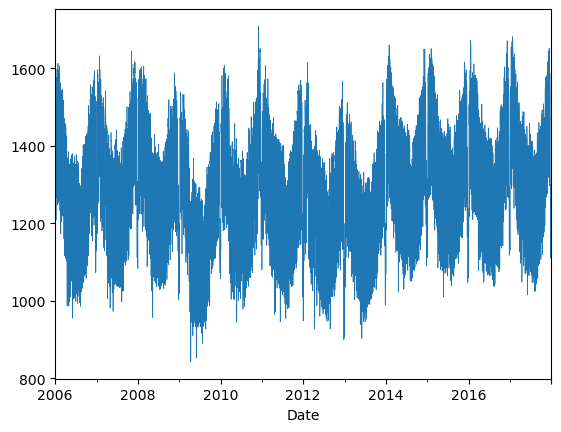

In [69]:
opsd_daily['Consumption'].plot(linewidth=0.5);

Kita dapat melihat bahwa method plot() memilih lokasi tick yang cukup bagus (setiap dua tahun) dan label (years) untuk sumbu x, yang sangat membantu. Namun, dengan banyaknya titik data, line plot menjadi padat dan sulit untuk dibaca.

Mari kita plot data sebagai titik-titik, dan lihat juga time series dari Matahari dan Angin.

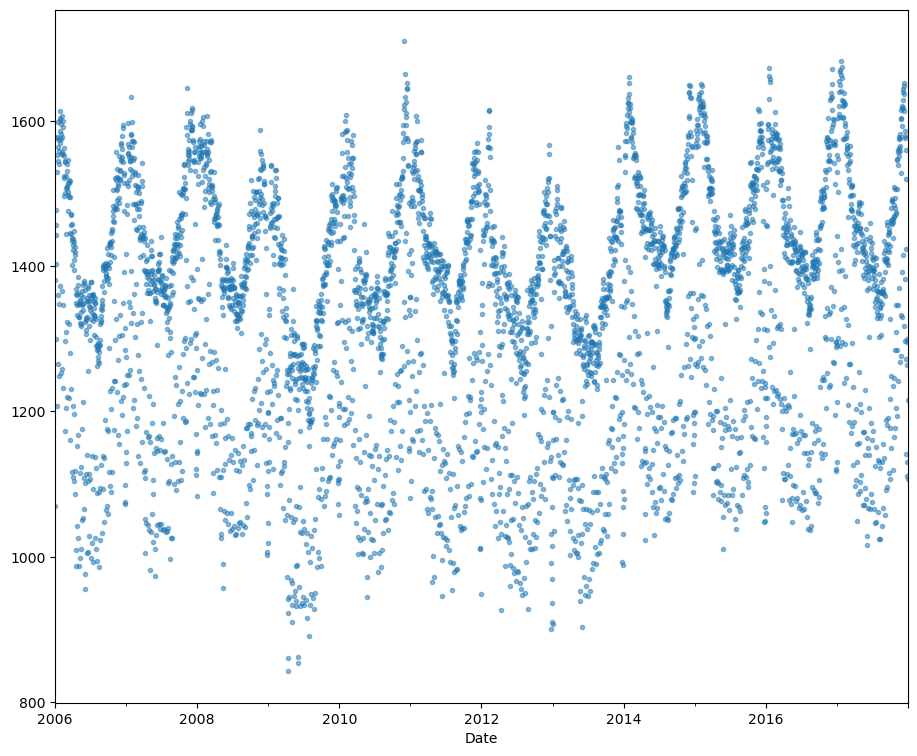

In [70]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

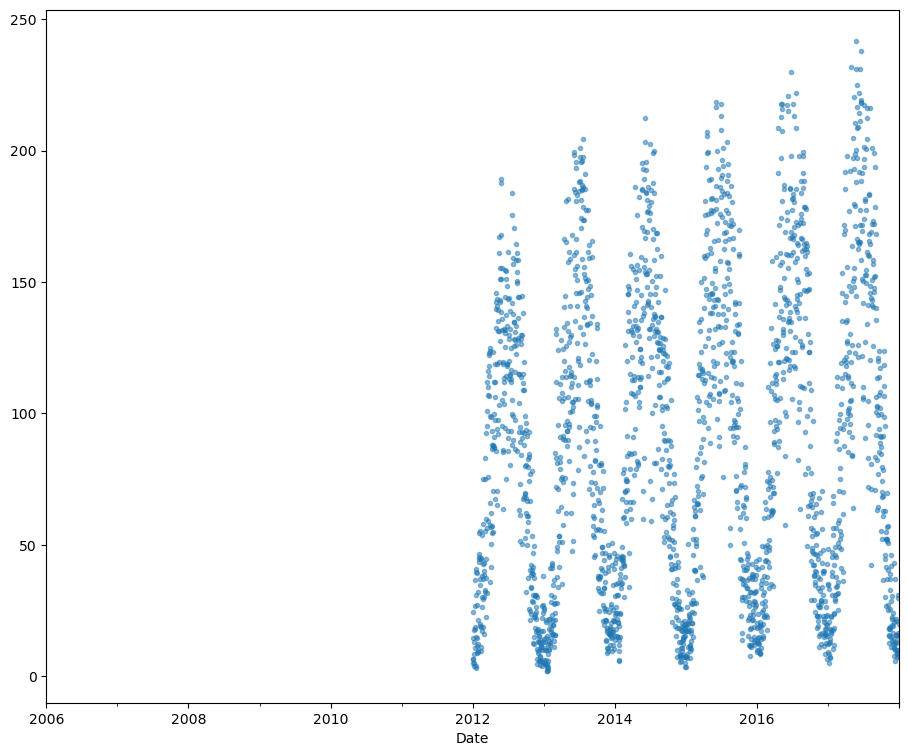

In [71]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

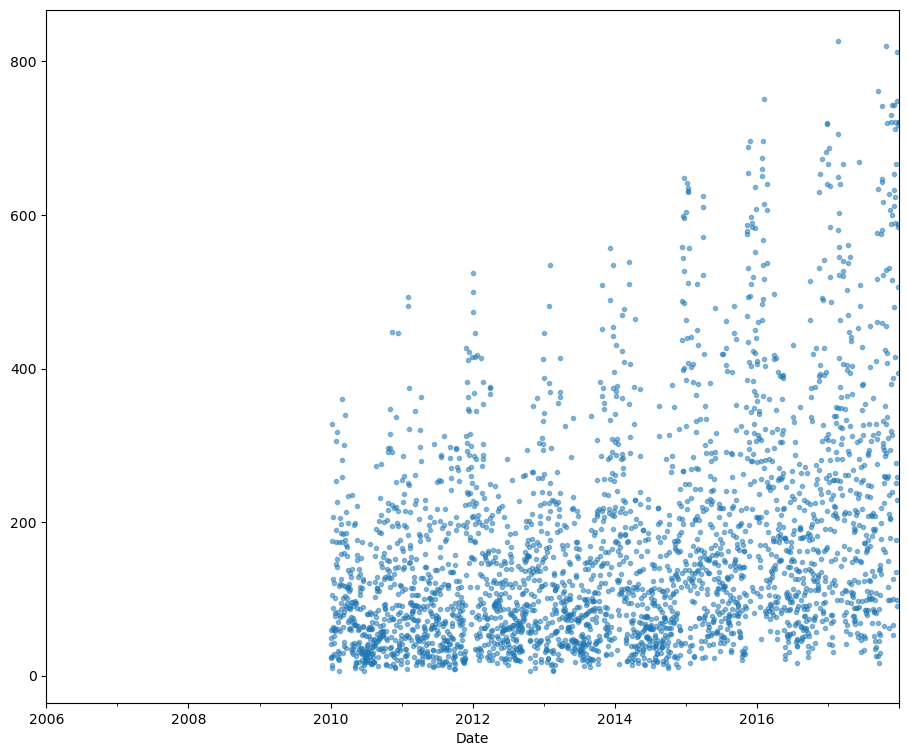

In [72]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

Kita sudah bisa melihat beberapa pola menarik yang muncul:

Konsumsi listrik tertinggi ada di musim dingin, kemungkinan karena pemanas listrik dan peningkatan penggunaan penerangan, dan terendah di musim panas.

Produksi tenaga surya paling tinggi di musim panas, saat sinar matahari paling melimpah, dan paling rendah di musim dingin.

Produksi tenaga angin paling tinggi di musim dingin, mungkin karena angin yang lebih kuat dan badai yang lebih sering, dan paling rendah di musim panas.

Tampaknya ada tren peningkatan yang kuat dalam produksi tenaga angin selama bertahun-tahun.

Ketiga time series dengan jelas menunjukkan periodisitas — sering disebut sebagai seasonality dalam time series analysis — di mana sebuah pola berulang berulang kali pada interval waktu yang teratur. Rangkaian waktu Consumption, Solar, dan Wind berosilasi antara nilai tinggi dan rendah dalam skala waktu tahunan, sesuai dengan perubahan cuaca musiman sepanjang tahun. Namun, musim secara umum tidak harus sesuai dengan musim meteorologi. Misalnya, data penjualan ritel sering kali menunjukkan musim tahunan dengan peningkatan penjualan pada bulan November dan Desember, menjelang liburan.

Seasonality juga dapat terjadi pada skala waktu lain. Plot di atas menunjukkan bahwa konsumsi listrik Jerman mungkin terlihat weekly seasonality, sesuai dengan hari kerja dan akhir pekan. Mari kita plot deret waktu dalam satu tahun untuk menyelidiki lebih lanjut.

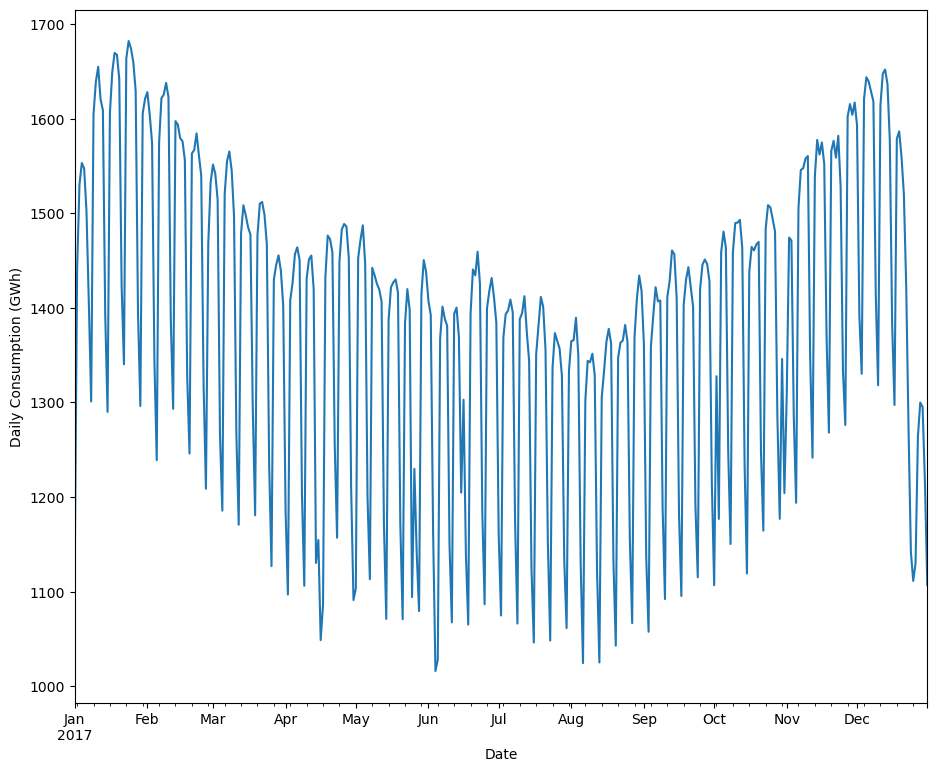

In [73]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Sekarang kita dapat dengan jelas melihat osilasi mingguan/weekly oscillations. Ciri menarik lain yang terlihat pada tingkat granularitas ini adalah penurunan drastis konsumsi listrik pada awal Januari dan akhir Desember, selama liburan.

Mari kita perbesar lebih jauh dan lihat bulan Januari dan Februari saja.

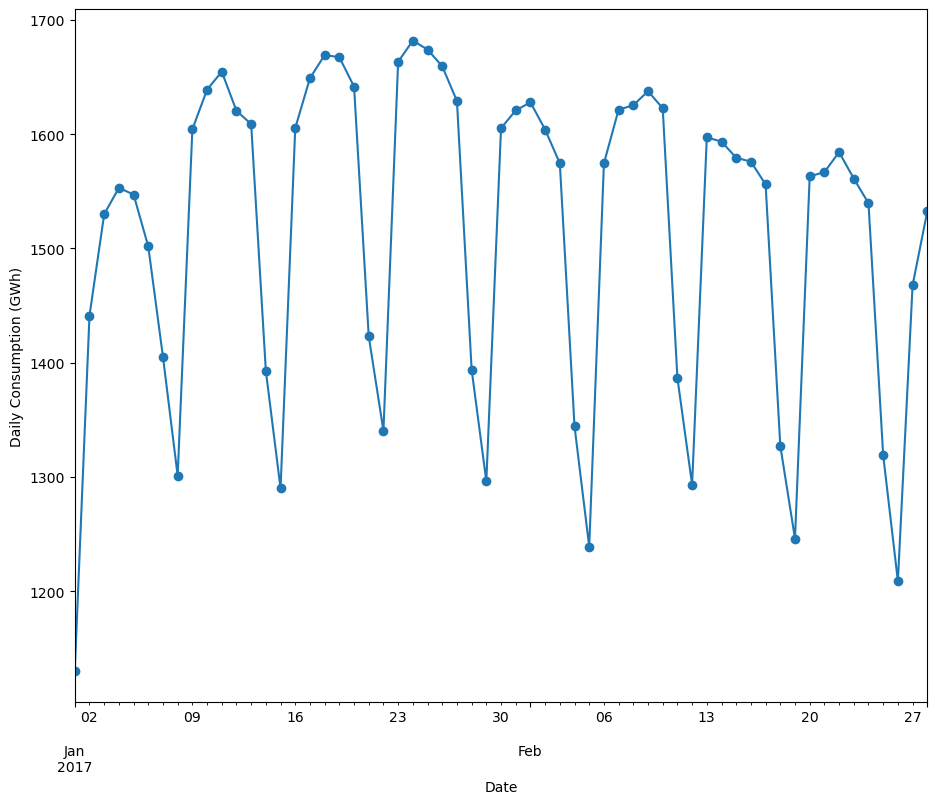

In [74]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Selanjutnya, mari kita jelajahi lebih jauh seasonality data kita dengan fungsi box plots untuk mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok. Pertama-tama, kita akan mengelompokkan data berdasarkan bulan, untuk memvisualisasikan yearly seasonality.

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

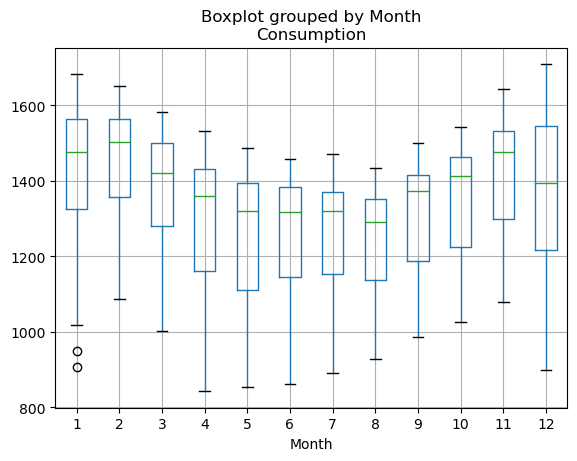

In [75]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

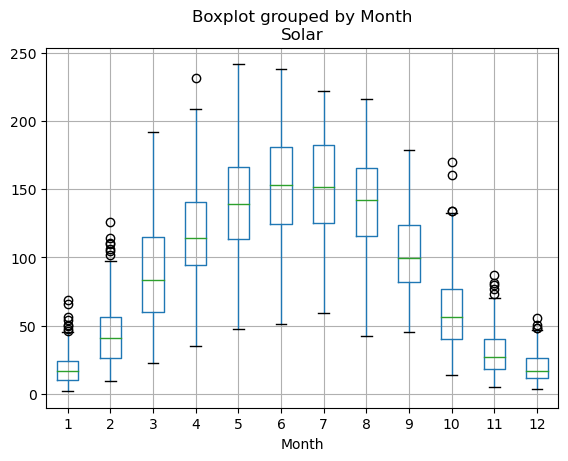

In [76]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<Axes: title={'center': 'Wind'}, xlabel='Month'>

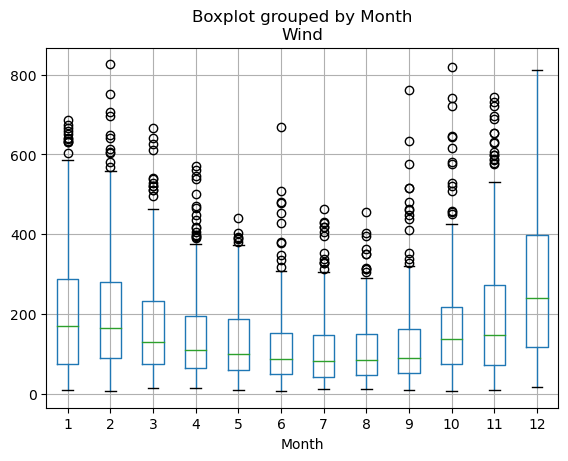

In [77]:
opsd_daily.boxplot(column=['Wind'], by='Month')

box plots berikut mengonfirmasi yearly seasonality yang kitalihat di plot sebelumnya dan memberikan beberapa insights:

Meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah di musim panas, median dan dua kuartil lebih rendah lebih rendah pada bulan Desember dan Januari dibandingkan dengan November dan Februari, kemungkinan karena bisnis tutup selama liburan. Kita melihat ini dalam rangkaian waktu untuk tahun 2017, dan box plot menegaskan bahwa ini adalah pola yang konsisten selama bertahun-tahun.

Sementara produksi tenaga surya dan angin sama-sama menunjukkan yearly seasonality, distribusi tenaga angin memiliki lebih banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca sementara lainnya.

Selanjutnya, mari kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality.

<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

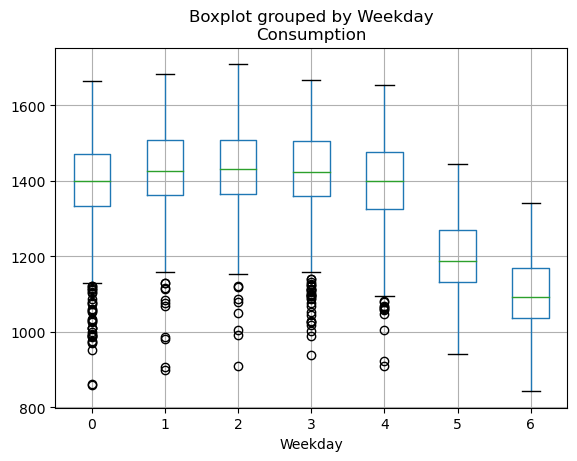

In [78]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

Seperti yang diharapkan, konsumsi listrik secara signifikan lebih tinggi pada hari kerja dibandingkan pada akhir pekan. Outliers rendah pada hari kerja mungkin selama hari libur/holidays.

Seringkali berguna untuk resample data time series kita ke frekuensi yang lebih rendah atau lebih tinggi. Resampling ke frekuensi yang lebih rendah (downsampling) biasanya melibatkan operasi agregasi - misalnya, menghitung total penjualan bulanan dari data harian. Resampling ke frekuensi yang lebih tinggi (upsampling) kurang umum dan sering kali melibatkan interpolasi atau metode pengisian data lainnya - misalnya, menginterpolasi data cuaca setiap jam hingga interval 10 menit untuk dimasukkan ke model ilmiah.

Kita akan fokus di sini pada downsampling, mengeksplorasi bagaimana hal itu dapat membantu kita menganalisis data OPSD dalam berbagai skala waktu. Kita menggunakan method resample() DataFrame, yang membagi DatetimeIndex ke dalam time bins dan mengelompokkan data menurut time bin. Metode resample() mengembalikan objek Resampler, mirip dengan objek GroupBy pandas. Kita kemudian dapat menerapkan metode agregasi seperti  mean(), median(), sum(), dll., Ke grup data untuk setiap time bin.

Misalnya, mari kita resample data menjadi weekly mean time series.

In [79]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Baris pertama di atas, berlabel 2006-01-01, berisi rata-rata dari semua data yang ada dalam time bin 2006-01-01 hingga 2006-01-07. Baris kedua, berlabel 2006-01-08, berisi data rata-rata untuk time bin 2006-01-08 hingga 2006-01-14, dan seterusnya.

Berdasarkan konstruksi, deret waktu mingguan kita memiliki 1/7 poin data sebanyak deret waktu harian. Kita dapat mengonfirmasi ini dengan membandingkan jumlah baris dari dua DataFrame.

In [80]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<Axes: xlabel='Date'>

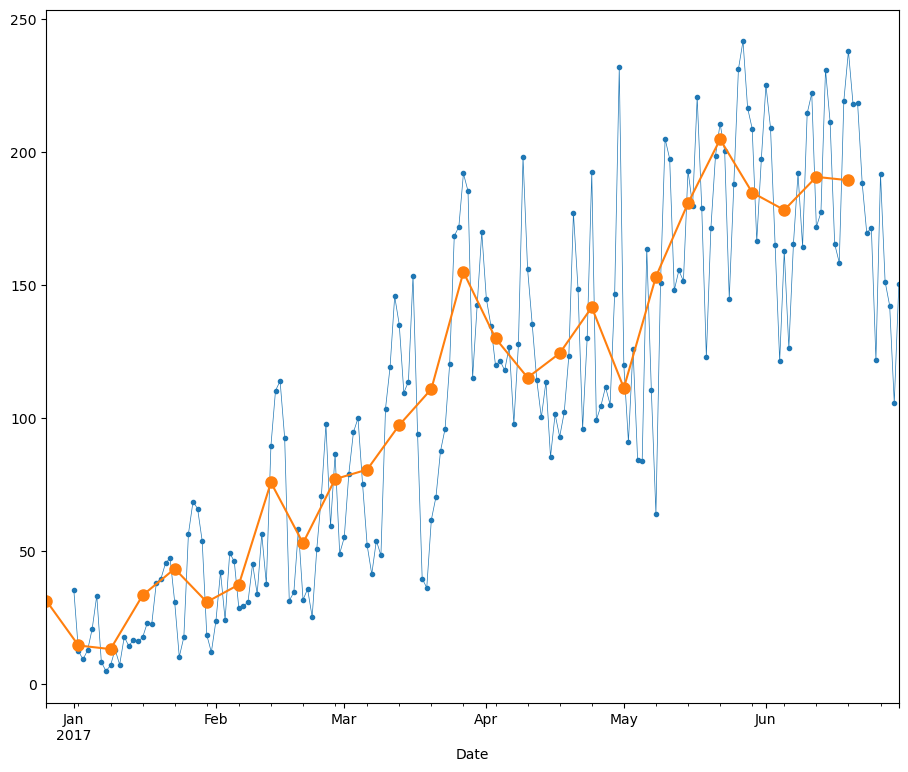

In [81]:
# Mari kita gambarkan rangkaian waktu Solar harian dan mingguan dalam satu periode enam bulan untuk membandingkannya.

start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

Kita dapat melihat bahwa deret waktu rata-rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling.